In [1]:
#Attentionの傾向をみる

In [2]:
path="EEGwithEDA.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [4]:
columns=["obs", "time", "Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2", "Attention", "Meditation", "Derived", "totPwr", "class" ]
sampling_rate=512
df=None

reader = pd.read_csv(path, encoding="SHIFT_JIS",header=None,names=columns)
reader=reader.drop(0,axis=0)#一行目はいらない

In [5]:
#Attentionを変換する
df_At=[]
df_At.append(reader.Attention)
print(df_At)

[1       NA
2       NA
3       NA
4       51
5       48
      ... 
601     35
602     35
603     30
604     23
605     16
Name: Attention, Length: 605, dtype: object]


In [6]:
#Meditationを変換する
df_Me=[]
df_Me.append(reader.Meditation)
print(df_Me)

[1       NA
2       NA
3       NA
4       38
5       30
      ... 
601     44
602     47
603     44
604     44
605     37
Name: Meditation, Length: 605, dtype: object]


In [7]:
#NAがあるのでNAは省く

In [8]:
#objectになっているのでintに変換
df_At=np.array(df_At,dtype=np.string_)
#二次元配列はグラフにしてくれないので１次元にする
df_At=df_At.flatten()

In [9]:
#objectになっているのでintに変換
df_Me=np.array(df_Me,dtype=np.string_)
#二次元配列はグラフにしてくれないので１次元にする
df_Me=df_Me.flatten()

In [10]:
df_At[0:3]=0
df_Me[0:3]=0

In [11]:
df_At=np.array(df_At,dtype=np.int64)
df_Me=np.array(df_Me,dtype=np.int64)

In [12]:
print(df_At)

[ 0  0  0 51 48 70 94 87 93 93 93 75 93 78 40 38  1  1  1  1 10  1 17 34
 35 41 54 60 53 64 30 30 13 13 37 40 56 53 38 14 13  1  1  1  1  1 10 13
 23 34 30 43 23  1  7  8 29 30 29 27 16 35 37 26 23 37 23 26 30 11 20 35
 44 43 48 37 27 30 17 14 13 16 21 11 11  1  1  1  1  1  8 17 27 34 30 24
 21 41 23 21 17  1 10 29 41 34 21 10 13 21 27 29 17 13 10  4 10  8 21 17
 10 13  4  7 14 20 11 11  1  7 14 20 27 14  8  7 11 20 41 35 37 29 26 37
 27 30 30 26 27 16 20 23 29 40 27 21 27 38 41 50 51 44 35 14  1  4 16 21
 27 23 14 20 27 20 27 35 23 29 30 16 16 13  3 14 27 43 56 50 40 40 34 38
 54 47 40 43 26 21 26 26 43 56 53 53 37 26 30 35 48 50 51 54 48 61 74 60
 56 47 34 37 29 26 26 26 38 43 43 47 29 30 24 20 16 14 21 24 43 43 35 37
 47 48 53 37 14  4  7 23 17 21 21 10 38 47 48 63 43 43 43 35 24 20 21 29
 44 40 37 26 30 21 16  4  1  8 11 24 20 16 20 27 37 38 41 21 14 14  4 10
 16 14 11 23 17  8 13  8 21 41 48 61 48 53 51 53 66 53 34 16  1  1  1  1
 10 16 40 50 37 26  8  1  4 11 20 14 16 11  3 14  7

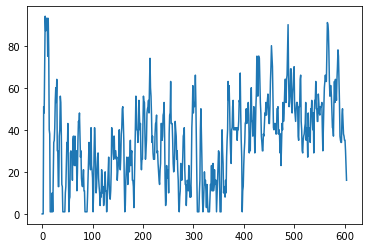

In [13]:
plt.plot(df_At)

In [14]:
df_t=[]
df_t.append(reader.time)
df_t=np.array(df_t,dtype=np.float64)
df_t=df_t.flatten()
print(df_t)

[  4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.
  16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.
  28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.
  40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.
  52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.
  64.   65.   66.   67.   68.   69.   70.   71.   72.   73.   74.   75.
  76.   77.   78.   79.   80.   81.   82.   83.   84.   85.   86.   87.
  88.   89.   90.   91.   92.   93.   94.   95.   96.   97.   98.   99.
 100.  101.  102.  103.  104.  105.  106.  107.  108.  109.  110.  111.
 112.  113.  114.  115.  116.  117.  118.  119.  120.  121.  122.  123.
 124.  125.  126.  127.  128.  129.  130.  131.  132.  133.  134.  135.
 136.  137.  138.  139.  140.  141.  142.  143.  144.  145.  146.  147.
 148.  149.  150.  151.  152.  153.  154.  155.  156.  157.  158.  159.
 160.  161.  162.  163.  164.  165.  166.  167.  168.  169.  170

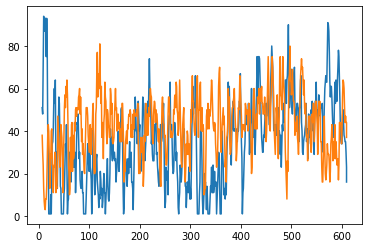

In [15]:
#順番の調整
plt.plot(df_t[3:len(df_t)],df_At[3:len(df_At)])
plt.plot(df_t[3:len(df_t)],df_Me[3:len(df_Me)])

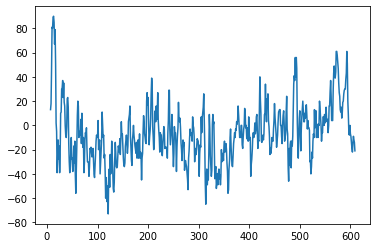

In [16]:
plt.plot(df_t[3:len(df_t)],df_At[3:len(df_At)]-df_Me[3:len(df_Me)])


In [17]:
print(df_At[3:len(df_At)]-df_Me[3:len(df_Me)])

[ 13  18  46  81  80  89  90  85  67  79  51   2  -5 -39 -28 -12 -28 -17
 -39 -24  10  11  30  31  37  23  35  19  16   0  -8 -10  -1  22  23  15
 -15 -30 -39 -36 -23 -10 -28 -27 -38 -34 -17 -31 -13 -41 -56 -37 -16   8
  20  16 -10  -5  -8  -7   5 -15  10  -6 -18 -10 -39 -31 -12  -6  -8  -2
 -19 -30 -30 -31 -42 -34 -19 -20 -18 -23 -26 -20 -19 -29 -40 -43 -34 -24
 -13  -8 -10  -9   4 -20 -16 -12 -40 -31 -21 -12  11   1 -10  -8 -27 -24
 -38 -60 -43 -54 -63 -50 -73 -43 -36 -51 -24 -40 -33 -13 -24 -37 -52 -55
 -47 -27 -14 -23 -34 -35 -34 -26 -17 -19 -22 -11 -24  -9   3  -8  -7 -17
 -27 -33 -34 -31 -17 -12  -8 -14 -23 -17   3   6   9  16  -9 -18 -29 -33
 -12  -7   0  -8 -17 -20 -23 -14 -27 -21 -12 -27 -19  -7 -27 -22 -24 -45
 -27 -23  -5   8   3  -7 -10 -14 -15  20  27  17  23  -1 -16  -9  -4   6
  26  39  33  -1  -9 -20 -18  10  12   3  16   5  10  27   4  -4 -10 -22
  -6  -8  -8 -21 -25 -16 -10  -1  -3 -19 -18 -19 -18 -19 -27  -6   4  29
  29  -3 -16  -9  -3   9  -6 -23 -34 -23  -1  -7  -

In [21]:
#AttentionとMedditationの差分(total)を取得するor比較する
total=sum(df_At[3:len(df_At)]-df_Me[3:len(df_Me)])
print(total)
sum_At=sum(df_At[3:len(df_At)])
sum_Me=sum(df_Me[3:len(df_Me)])
quat_sum=sum_At/sum_Me
print(quat_sum)

-4297
0.8307268071695884
